In [323]:
#!jt -t grade3 -ofs 18 -nfs 18 -tfs 24 -T

Execute `Run all Cells` under the `Cell` menu, first, to format the markdown cells

# Task 1

Perform a forward pass and a backward pass on the two-neuron ffANN in the figure below to compute the gradient $\frac{\partial L(b,w|x)}{\partial w_1}$ and use this to compute and updated weight $w'_1$.

Don't worry! We will guide you through this, provide some template code and help fill in the values of the intermediate expression in a a Forward pass table and and Backward pass table, respectively.

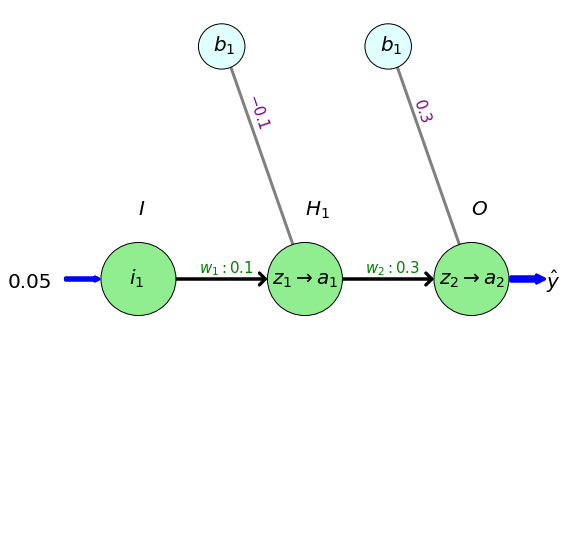

In [324]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join('..', 'common_assets')))
from draw_neural_net import draw_neural_net

def sigma(z):
  return 1/(1+np.exp(-z))

#-----1-1-1
layer_sizes = [1,1,1]

x= 0.05
y = 0.1
i1 = x
w1 = 0.1
w2=0.3
b1 = -0.10
b2 = 0.30
z1 = w1*i1+b1
a1 = sigma(z1)
z2 = w2*a1+b2
a2 = sigma(z2)
C = 0.5 * (y-a2)**2
# z1 = round(z1, 2)
# a1 = round(a1, 2)
# z2 = round(z2, 2)
# a2 = round(a2, 2)
# C = round(C,2)

eta = 0.3

dlda2 = a2-y
da2dz2= a2*(1-a2)
dcdz2 = dlda2 * da2dz2
dz2da1 = w2
dcda1 = dcdz2 * dz2da1
da1dz1 = a1*(1-a1)
dcdz1 = dcda1 * da1dz1
dz1dw1 = i1
dcdw1 = dcdz1 * dz1dw1

wnew = w1 - eta * dcdw1

weights = [
    np.array(
        [
            ["w_1:{}".format(w1)]
         ]
    ),
    np.array(
        [
            [ "w_2:{}".format(w2)]
        ]
    )
]
biases = [
    np.array(
        ["{}".format(b1)]
    ), 
    np.array(
        ["{}".format(b2)]
    )
]

hidden = [
                np.array(
                [ r"$i_1$"]
                ),
                np.array(
                [ r"$z_1\rightarrow a_1$"]
                ),
                np.array(
                [ r"$z_2\rightarrow a_2$"]
                ),
]

figExercise = plt.figure(figsize=(10, 10))
ax = figExercise.gca()
ignore=ax.axis('off')

draw_neural_net(ax, 
                layerSizes = layer_sizes, 
                weights = weights, 
                otherNodePrefix = hidden,
                biases=biases, 
                inputPrefix = ["{}".format(x)], 
                outputPrefix = "\hat{y}",
                nodeFontSize=20, edgeFontSize = 15, edgeWidth = 3
               )
#plt.show()

## Forward pass

Let's start by performing the forward pass of the ANN.

We will start by creating variables to hold the values of the intermediate and final expressions

In [325]:
# Known variables
# Initialize variables to values in figure
x = 0.05
y = 0.01
w1 = 0.1
b1 = -0.1
w2 = 0.3
b2 = 0.3

# Unknown variables to be computed
i1 = ""
z1 = ""
a1 = ""
z2 = ""
a2 = ""
haty = ""
L = ""

Execute the table cell below to display table

In [326]:
import pandas as pd

# Some styling for the 
props1 = [
    ("font-size", "18px"),
    ('max-width', '2.5cm'),
    ('text-align', 'left')
#    ('padding', '2.5cm)')
#    ("font-size", "24px"),
#    ('max-width', '2cm'),
#    ('text-align', 'center'),
#    ('padding', '5cm)')
]
styles1 = [
    dict(selector="th", props=props1),
    dict(selector="td", props=props1),
]
colNames = { 
        "x" : r"$x$",
        "y" : r"$y$",
        "w1" : r"$w_1$",
        "b1" : r"$b_1$",
        "i1" : r"$i_1$", 
        "z1" : r"$z_1$", 
        "a1" : r"$a_1$",
        "w2" : r"$w_2$",
        "b2" : r"$b_2$",
        "z2" : r"$z_2$",
        "a2" : r"$a_2$",
        "haty" : r"$\hat{y}$",
        "L" : "$L(w,b|x)$"
}


# Code below is what is needed to update table at each step
tab = pd.Series(
    { 
        "x" : format(x, ".2g"), # Use this format to display nicely in table
        "y" : format(y, ".2g"),
        "w1" : format(w1, ".2g"), 
        "b1" : format(b1, ".2g"), 
        "i1" : "" if isinstance(i1, str) else format(i1, ".2g"), 
        "z1" : "" if isinstance(z1, str) else format(z1, ".2g"), 
        "a1" : "" if isinstance(a1, str) else format(a1, ".2g"), 
        "w2" : format(w2, ".2g"), 
        "b2" : format(b2, ".2g"),        
        "z2" : "" if isinstance(z2, str) else format(z2, ".2g"),
        "a2" : "" if isinstance(a2, str) else format(a2, ".2g"),
        "haty" : "" if isinstance(haty, str) else format(haty, ".2g"),
        "L" : "" if isinstance(L, str) else format(L, ".2g").center(12, '\u00A0')
    }
)
tab1=pd.DataFrame.rename(tab.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab1

$x$,$y$,$w_1$,$b_1$,$i_1$,$z_1$,$a_1$,$w_2$,$b_2$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.01,0.1,-0.1,,,,0.3,0.3,,,,


### Path of intermediate expressions

First, notice that $i_1 = x$ and $\hat{y} = a_2$.

The path of intermediate expressions from $x$ to $L(b,w|x)$ is:

$\begin{eqnarray}
z_1 &=&  w_1 i_1 + b_1\\
a_1 &=& \sigma(z_1) = \frac{1}{1+e^{-z_1}}\\
z_2 &=&  w_2 a_{1} + b_2\\
a_2 &=& \sigma(z_2) = \frac{1}{1+e^{-z_2}}\\
L(w,b|x) &=& \frac{1}{2}\left(y-\hat{y}\right)^2 = \frac{1}{2}\left(y-a_2\right)^2
\end{eqnarray}$
- *hint!*: to compute $\sigma(z)$, use, e.g.
```
import tensorflow as tf
tf.sigmoid(z).numpy()
``` 

In [327]:
# Replace "" with the code to compute these variables
import tensorflow as tf
i1 = ""
z1 = ""
a1 = ""
z2 = ""
a2 = ""
haty = ""
L = ""

In [328]:
# Code below is what is needed to update table at each step
tab = pd.Series(
    { 
        "x" : format(x, ".2g"), # Use this format to display nicely in table
        "y" : format(y, ".2g"),
        "w1" : format(w1, ".2g"), 
        "b1" : format(b1, ".2g"), 
        "i1" : "" if isinstance(i1, str) else format(i1, ".2g"), 
        "z1" : "" if isinstance(z1, str) else format(z1, ".2g"), 
        "a1" : "" if isinstance(a1, str) else format(a1, ".2g"), 
        "w2" : format(w2, ".2g"), 
        "b2" : format(b2, ".2g"),        
        "z2" : "" if isinstance(z2, str) else format(z2, ".2g"),
        "a2" : "" if isinstance(a2, str) else format(a2, ".2g"),
        "haty" : "" if isinstance(haty, str) else format(haty, ".2g"),
        "L" : "" if isinstance(L, str) else format(L, ".2g").center(12, '\u00A0')
    }
)
tab1=pd.DataFrame.rename(tab.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab1

$x$,$y$,$w_1$,$b_1$,$i_1$,$z_1$,$a_1$,$w_2$,$b_2$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.01,0.1,-0.1,0.05,-0.095,0.48,0.3,0.3,0.44,0.61,0.61,-0.3


## Task 2 

Perform a backward pass to update the value of $w_1$, that is, use the chain rule to split $\frac{\partial L(b,w|x)}{\partial w_1}$, create variables for the intermediate expressions and compute their values, values compute the value of $\frac{\partial L(b,w|x)}{\partial w_1}$, and compute $w'_2$ (i.e., the updated value of $w_2$)

Let's first print out the ANN and the table with values from the forward pass again, just to have them handy 

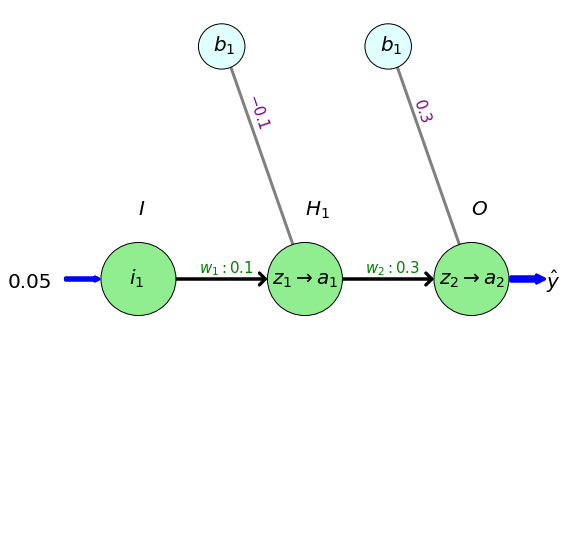

In [331]:
figExercise

In [332]:
tab1

$x$,$y$,$w_1$,$b_1$,$i_1$,$z_1$,$a_1$,$w_2$,$b_2$,$z_2$,$a_2$,$\hat{y}$,"$L(w,b|x)$"
0.05,0.01,0.1,-0.1,0.05,-0.095,0.48,0.3,0.3,0.44,0.61,0.61,-0.3


### 1. The relevant path

The path from $w_1$ to $L(w,b|x)$ is

$\begin{eqnarray}
z_1 &=&  w_1 i_1 + b_1\\
a_1 &=& \sigma(z_1) = \frac{1}{1+e^{-z_1}}\\
z_2 &=&  w_2 a_{1} + b_2\\
a_2 &=& \sigma(z_2) = \frac{1}{1+e^{-z_2}}\\
L(w,b|x) &=& \frac{1}{2}\left(y-\hat{y}\right)^2 = \frac{1}{2}\left(y-a_2\right)^2
\end{eqnarray}$

### 2. Apply the chain  rule

Appying the chain rule on $a$'s and $z$'s of the layers backwards (from right to left in the figure) gives (green color indicates which expression to split in the next row):

<!--
$\hspace{1cm}\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_1} &=&  \frac{\partial a_2}{\partial w_1}\times \frac{\partial L(w,b|x)}{\partial a_2} 
\end{eqnarray}$

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial a_2}{\partial w_1} &=&  \frac{\partial z_2}{\partial w_1}\times \frac{\partial a_2}{\partial z_2} 
\end{eqnarray}$

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial z_2}{\partial w_1} &=&  \frac{\partial a_1}{\partial w_1}\times \frac{\partial z_2}{\partial a_1} 
\end{eqnarray}$

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial a_1}{\partial w_1} &=&  \frac{\partial z_1}{\partial w_1}\times \frac{\partial a_1}{\partial z_1} 
\end{eqnarray}$

$\hspace{1cm}\begin{eqnarray} 
\frac{\partial z_1}{\partial w_1x} &=&  \frac{\partial w_1 \times i_1 + b_1}{\partial w_1}
\end{eqnarray}$
-->


$\hspace{1cm}\begin{eqnarray} 
\frac{\partial L(w,b|x)}{\partial w_1} 
&=&  
\color{green}{\frac{\partial a_2}{\partial w_1}} 
\times \frac{\partial L(w,b|x)}{\partial a_2} \\
%\frac{\partial L(w,b|x)}{\partial w_1} 
&=&  
\color{green}{\frac{\partial z_2}{\partial w_1}}
\times \frac{\partial a_2}{\partial z_2} 
\times \frac{\partial L(w,b|x)}{\partial a_2} \\
%\frac{\partial L(w,b|x)}{\partial w_1} 
&=&  
\color{green}{\frac{\partial a_1}{\partial w_1}}
\times \frac{\partial z_2}{\partial a_1}
\times \frac{\partial a_2}{\partial z_2} 
\times \frac{\partial L(w,b|x)}{\partial a_2} \\
%\frac{\partial L(w,b|x)}{\partial w_1} 
&=&  
\color{green}{\frac{\partial z_1}{\partial w_1}}
\times \frac{\partial a_1}{\partial z_1} 
\times \frac{\partial z_2}{\partial a_1}
\times \frac{\partial a_2}{\partial z_2} 
\times \frac{\partial L(w,b|x)}{\partial a_2} 
\end{eqnarray}$

We see that we have already computed the last of these partial derivatives, namely $\frac{\partial a_2}{\partial z_2}$ and $\frac{\partial L(w,b|x)}{\partial a_2}$. This is a very nice feature of back-propagation:  
$\quad$_If we have computed the values of partial derivatives for a layer, we can **reuse** these expressions in the preceeding layer._

(In computer science terms, back propagation is a _dynamic programming_ algorithm, that is, it is works in an iterative fashion, tabulates the values from one iteration (=layer), and reuses them in the next iteration in the algorithm (i.e., the previous layer, since we go backwards).)

Let's set up python variables for these intermediate expressions (reuse the ones already computed!):

In [1]:
# Unknown variables to compute in Back-propagation

#dLda2 = a2 - y # Already computed, reuse
#da2dz2 = a2 * (1-a2) # Already computed, reuse!
dz2da1 = ""
da1dz1 = ""
dz1dw1 = ""
dLdw1 = ""
eta = 0.05
w1new = ""


And a table with these values (execute the table cell to update the table!)

In [334]:
props2 = [
    ("font-size", "18px"),
    ('max-width', '3cm'),
    ('text-align', 'center')
]
styles2 = [
    dict(selector="th", props = props2),
    dict(selector="td", props=props2)
]

colNames = { 
    "w1new" : r"$w'_1$",
    "eta" : r"$\eta$",
    "dLdw1" : r"$\frac{\partial L(w,b|x)}{\partial w_1}$",
    "dz1dw1" : r"$\frac{\partial z_1}{\partial w_1}$",
    "da1dz1" : r"$\frac{\partial a_1}{\partial z_1}$",
    "dz2da1" : r"$\frac{\partial z_2}{\partial a_1}$",
    "da2dz2" : r"$\frac{\partial a_2}{\partial z_2}$",
    "dLda2" : r"$\frac{\partial L(w,b|x)}{\partial a_2}$"
}

# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".2g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".2g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".2g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".2g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".2g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".2g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".2g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".2g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3


$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.05,,,,,0.24,0.51


### 3. Solve partial derivatives 1$
$\begin{eqnarray}
\frac{\partial z_2}{\partial a_1} 
&=&  \frac{\partial w_2 a_1 +b_1}{\partial a_1} \\
&=& w_2
\end{eqnarray}

In [335]:
# Replace "" with the code to compute these variables
dz2da1 = ""

And a table with these values (execute the table cell to update the table!)

In [336]:
# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".2g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".2g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".2g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".2g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".2g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".2g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".2g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".2g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3



$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.05,,,,0.3,0.24,0.51


### 3. Solve partial derivatives 2
$\begin{eqnarray}
\frac{\partial a_1}{\partial z_2} 
&=&  \frac{\partial \sigma(z_2)}{\partial z_2} \\
&=& \sigma(z_2)\left(1-\sigma(z_2)\right)\\
&=& a_1\left(1-a_1\right)
\end{eqnarray}$

In [337]:
# Replace "" with the code to compute these variables
da1dz1 = ""

And a table with these values (execute the table cell to update the table!)

In [338]:
# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".2g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".2g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".2g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".2g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".2g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".2g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".2g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".2g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3



$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.05,,,0.25,0.3,0.24,0.51


### 3. Solve partial derivatives  3
$\begin{eqnarray}
\frac{\partial z_1}{\partial w_1} 
&=&  \frac{\partial w_1 i_1 + b_1}{\partial w_1}\\
&=& i_1
\end{eqnarray}$

In [339]:
# Replace "" with the code to compute these variables
dz1dw1 = ""

And a table with these values (execute the table cell to update the table!)

In [340]:
# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".2g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".2g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".2g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".2g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".2g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".2g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".2g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".2g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3



$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.05,,0.05,0.25,0.3,0.24,0.51


### 4. Compute the requested (full) partial derivative

$\begin{eqnarray}
\frac{\partial L(b,w|x)}{\partial w_1} 
&=&  
\frac{\partial z_1}{\partial w_1} 
\times
\frac{\partial a_1}{\partial z_1} 
\times
\frac{\partial z_2}{\partial a_1} 
\times
\frac{\partial a_2}{\partial z_2} 
\times
\frac{\partial L(b,w|x)}{\partial a_2} 
\end{eqnarray}$

In [341]:
# Replace "" with the code to compute these variables
dLdw1 = ""

And a table with these values (execute the table cell to update the table!)

In [342]:
# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".2g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".2g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".2g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".2g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".2g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".2g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".2g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".2g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3

$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
,0.05,0.00053,0.05,0.25,0.3,0.24,0.51


### 5. Update $w_1$

$\begin{eqnarray}
w'_1
&=&  w_1 - \eta \frac{\partial L(b,wx)}{\partial w_1}
\end{eqnarray}$

In [2]:
# Replace "" with the code to compute these variables
w1new = ""

And a table with these values (execute the table cell to update the table!)

In [344]:
# Code below is what is needed to update table at each step
tab3 = pd.Series(
    { 
        "w1new" : "" if isinstance(w1new, str) else format(w1new, ".2g"),
        "eta" : "" if isinstance(eta, str) else format(eta, ".2g"),
        "dLdw1" : "" if isinstance(dLdw1, str) else format(dLdw1, ".2g"), 
        "dz1dw1" : "" if isinstance(dz1dw1, str) else format(dz1dw1, ".2g"),
        "da1dz1" : "" if isinstance(da1dz1, str) else format(da1dz1, ".2g"), 
        "dz2da1" : "" if isinstance(dz2da1, str) else format(dz2da1, ".2g"),
        "da2dz2" : "" if isinstance(da2dz2, str) else format(da2dz2, ".2g"),
        "dLda2" : "" if isinstance(dlda2, str) else format(dlda2, ".2g").center(12, '\u00A0')
    }
)



tab3 = pd.DataFrame.rename(tab3.to_frame().T, columns = colNames).style.hide_index().set_table_styles(styles1)
tab3

$w'_1$,$\eta$,"$\frac{\partial L(w,b|x)}{\partial w_1}$",$\frac{\partial z_1}{\partial w_1}$,$\frac{\partial a_1}{\partial z_1}$,$\frac{\partial z_2}{\partial a_1}$,$\frac{\partial a_2}{\partial z_2}$,"$\frac{\partial L(w,b|x)}{\partial a_2}$"
0.1,0.05,0.00053,0.05,0.25,0.3,0.24,0.51
